In [265]:
# Libarary

import pandas as pd
import time
import mysql.connector
import openpyxl
import json
import requests
import folium
import geopandas as gpd

import collections
import numpy as np
import pydeck
from IPython.display import display, clear_output


import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothicOTF') # For MacOS

from glob import glob
import os
import math
from tqdm import tqdm
import random
import uuid

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import TimeoutException


from bs4 import BeautifulSoup
from time import gmtime, strftime

import folium
from folium.plugins import MiniMap
from folium.plugins import HeatMap

import mysql.connector

from haversine import haversine

In [266]:
def GetLocationInfo(keyword):
    try:
        url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(keyword) # 키워드로 검색하는 URL 주소 요청
        headers = {'authorization': 'KakaoAK 58319f62a30cce26d40b890be26fc6fd'}
        # result = json.loads(str(requests.get(url, headers=headers).text))
        search_result_list = requests.get(url, headers = headers).json()['documents']
        search_result_1st = search_result_list[0]
        address = str(search_result_1st['road_address_name'])
        address_token = str(search_result_1st['address_name']).split(' ')
        for each_token in address_token:
            if each_token.endswith('동'):
                dong = each_token
            
        X = search_result_1st['y']
        Y = search_result_1st['x']
        list = [address, dong, X, Y]
        return list
    except:
        print(f'{keyword} 검색 결과에는 주소, X, Y 를 찾을 수 없습니다')

In [267]:
# path = '/Users/sunwoongkim/dev/driver/chromedriver-mac-arm64/'
# driver_path = path + 'chromedriver'
# driver = webdriver.Chrome(service = Service(driver_path))
# action = ActionChains(driver)
# url = 'https://m.land.naver.com'
# driver.get(url)


In [268]:
GetLocationInfo('가락동SK허브파크(주상복합)')

['서울 송파구 오금로 396', '가락동', '37.49797282088963', '127.13425633697337']

In [269]:
# apt_web_list = driver.find_elements(By.CLASS_NAME,'keyword')
# apt_list = []
# for each_apt__web_list in apt_web_list:
#     apt_name = each_apt__web_list.text
#     apt_list.append(apt_name)

In [ ]:
projectdb = mysql.connector.connect(
    host="",
    user="master",
    password="",
    database="edaproject"
)
cursor = projectdb.cursor()

query = '''
SELECT * FROM edaproject.APARTMENT_PRICE_GARAK
group by APARTMENT
'''

df = pd.read_sql(query, projectdb)
df = df['APARTMENT']

/var/folders/79/m8mlq40133v66kkf7xw8f89c0000gn/T/ipykernel_99731/3500026633.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, projectdb)


In [271]:
apt_list_with_location_info = []
for each_apt_list in df:
    try:
        location_info = GetLocationInfo('가락'+each_apt_list)
        location_info.insert(0, each_apt_list)
        apt_list_with_location_info.append(location_info)
    except:
        continue



가락가락3차쌍용스윗닷홈101동,102동 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락가락우성2 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락가락현대투웰브(101동) 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락송파동부쎈트레빌 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락청공빌딩주상복합-현대빌리지 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락한신1 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락가락그랑밸리 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락풍림1 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락금성프라자1 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락신한빌라트-신한미지엔 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락카나피아Ⅱ 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락가락현대투웰브(102동) 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락동궁리치웰1 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락신한에스빌-미지엔 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락아키죤II 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락로즈힐파크(A동) 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락로즈힐파크(B동) 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락현대빌라트1 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락시영2 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락시영1 검색 결과에는 주소, X, Y 를 찾을 수 없습니다


In [272]:
apt_list_with_location_info_df = pd.DataFrame(apt_list_with_location_info)
apt_list_with_location_info_df.astype({3 : float , 4 : float})

,0,1,2,3,4
0,가락(1차)쌍용아파트,서울 송파구 동남로 193,가락동,37.495611,127.128439
1,가락3차쌍용스윗닷홈(103동),서울 송파구 송이로21길 23,가락동,37.497741,127.122964
2,가락금호아파트,서울 송파구 송파대로32길 15,가락동,37.496363,127.116364
3,가락미륭아파트,서울 송파구 동남로11길 4,가락동,37.493825,127.128560
4,가락스타클래스,서울 송파구 오금로 306,가락동,37.502876,127.126122
...,...,...,...,...,...
61,프라임,서울 송파구 송파대로 278,가락동,37.494239,127.117753
62,에스디펠리체,서울 송파구 동남로14길 23-9,가락동,37.492450,127.132030
63,예일,서울 송파구 양재대로60길 11,가락동,37.498088,127.117420
64,씨티빌,서울 송파구 동남로14길 17-33,가락동,37.493221,127.132608


In [273]:
temp = GetLocationInfo('서울석병원')
loc1 = temp[2:4]
loc1 = list(map(float, loc1))

loc2= tuple(apt_list_with_location_info_df.iloc[0,:][3:5])
loc2 = list(map(float, loc2))

# df['Distance'] = df.apply(lambda row: haversine(temp[0], temp[1], row['Latitude'], row['Longitude']), axis=1)

distance = haversine(loc1, loc2, unit= "km") * 1000

loc2


[37.49561144556601, 127.1284385164609]

In [274]:
query = '''
SELECT * 
FROM edaproject.SCHOOL_INFO
WHERE GU LIKE '%송파%' 
  AND TOTAL_STUDENTS != 0 
  AND YEAR(FOUNDDATE) > 2014;
'''
school_list = pd.read_sql(query, projectdb)

/var/folders/79/m8mlq40133v66kkf7xw8f89c0000gn/T/ipykernel_99731/2024328034.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  school_list = pd.read_sql(query, projectdb)


In [275]:
school_list=school_list['NAME']
school_list

0       해누리중학교
1       위례솔중학교
2    서울위례별초등학교
3    서울위례솔초등학교
Name: NAME, dtype: object

In [276]:
school_list_with_location_info = []
for each_school_list in school_list:
    try:
        location_info = GetLocationInfo(each_school_list)
        location_info.insert(0, each_school_list)
        school_list_with_location_info.append(location_info)
    except:
        continue


In [277]:
school_list_with_location_info_df = pd.DataFrame(school_list_with_location_info)

In [278]:
m = folium.Map(location=[37.51161181809386,126.98442514704972],
               zoom_start=11
               )

for idx, row  in apt_list_with_location_info_df.iterrows():
                folium.Marker((row[3], row[4]),
                tooltip=(row[0], row[1]),
                icon=folium.Icon( prefix='fa',color = 'blue'),
                ).add_to(m)

for idx, row  in school_list_with_location_info_df.iterrows():
                folium.Marker((row[3], row[4]),
                tooltip=(row[0], row[1]),
                icon=folium.Icon( prefix='fa',color = 'red'),
                ).add_to(m)

m

In [279]:
query = '''
SELECT * FROM edaproject.HANNAM_APARTMENT;
'''
df = pd.read_sql(query, projectdb)

df = df['APARTMENT']

/var/folders/79/m8mlq40133v66kkf7xw8f89c0000gn/T/ipykernel_99731/3736901264.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, projectdb)


In [280]:
final_list = []
for idx , each_school in school_list_with_location_info_df.iterrows():
    school_latlon = list(map(float,list(each_school[[3,4]])))
    for idx, each_apt in apt_list_with_location_info_df.iterrows():
        apt_latlon = list(map(float,list(each_apt[[3,4]])))
        distance = haversine(school_latlon, apt_latlon, unit= "km") * 1000
        row_list = []
        row_list.append(each_school[0])
        row_list.append(each_apt[0])
        row_list.append(distance)
        final_list.append(row_list)



In [281]:
df = pd.DataFrame(final_list)

In [282]:
df.columns = ['NAME', 'APARTMENT', 'DISTANCE']


In [283]:
query = '''
SELECT YEAR, MONTH, GU, DONG, APARTMENT, SIZE_m2, SIZE_평 , AVG(PRICE) as PRICE FROM edaproject.APARTMENT_PRICE_GARAK
group by APARTMENT
'''

df1 = pd.read_sql(query, projectdb)

/var/folders/79/m8mlq40133v66kkf7xw8f89c0000gn/T/ipykernel_99731/4192791486.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, projectdb)


In [284]:
df1

,YEAR,MONTH,GU,DONG,APARTMENT,SIZE_m2,SIZE_평,PRICE
0,2024,1,송파구,가락동,가락(1차)쌍용아파트,59.92,18.1,7.421157e+08
1,2024,4,송파구,가락동,가락3차쌍용스윗닷홈(103동),84.94,25.7,7.286408e+08
2,2024,1,송파구,가락동,"가락3차쌍용스윗닷홈101동,102동",59.94,18.1,7.303115e+08
3,2024,6,송파구,가락동,가락금호아파트,59.66,18.0,7.476283e+08
4,2024,7,송파구,가락동,가락미륭아파트,50.00,15.1,5.902670e+08
...,...,...,...,...,...,...,...,...
81,2019,6,송파구,가락동,예일,253.59,76.7,7.925000e+08
82,2018,4,송파구,가락동,씨티빌,139.57,42.2,5.592778e+08
83,2017,2,송파구,가락동,시영2,56.17,17.0,6.580995e+08
84,2017,8,송파구,가락동,현대(5차)(재건축),60.62,18.3,6.637143e+08


In [285]:
temp = pd.merge(df, df1, how= 'left' , left_on='APARTMENT' , right_on= 'APARTMENT')

In [286]:
temp1 = temp[temp['NAME'] == '해누리중학교'].sort_values('DISTANCE')
temp2 = temp[temp['NAME'] == '위례솔중학교'].sort_values('DISTANCE')
temp3 = temp[temp['NAME'] == '서울위례별초등학교'].sort_values('DISTANCE')
temp4 = temp[temp['NAME'] == '서울위례솔초등학교'].sort_values('DISTANCE')


<Axes: >

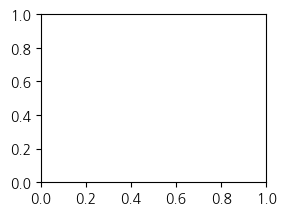

In [342]:
plt.subplot(221)

<Axes: xlabel='DISTANCE'>

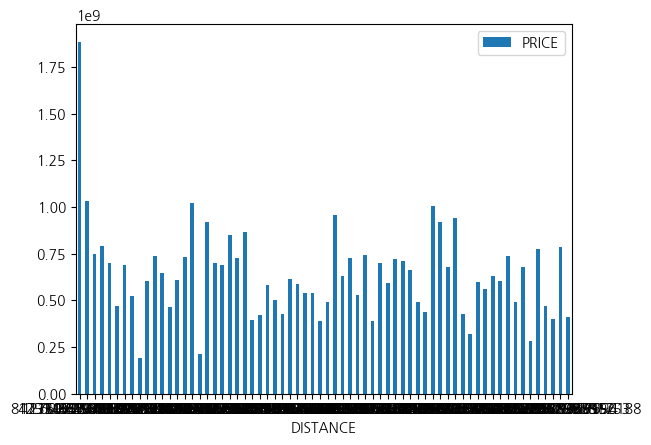

In [287]:
temp1.plot.bar(x='DISTANCE', y='PRICE', rot=0)

<Axes: xlabel='DISTANCE'>

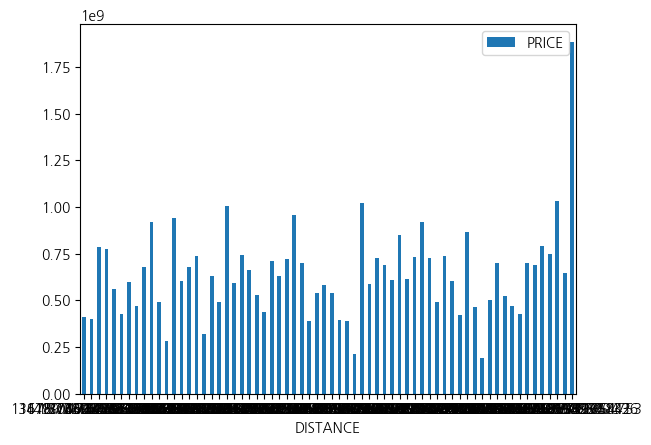

In [288]:
temp2.plot.bar(x='DISTANCE', y='PRICE', rot=0)

<Axes: xlabel='DISTANCE'>

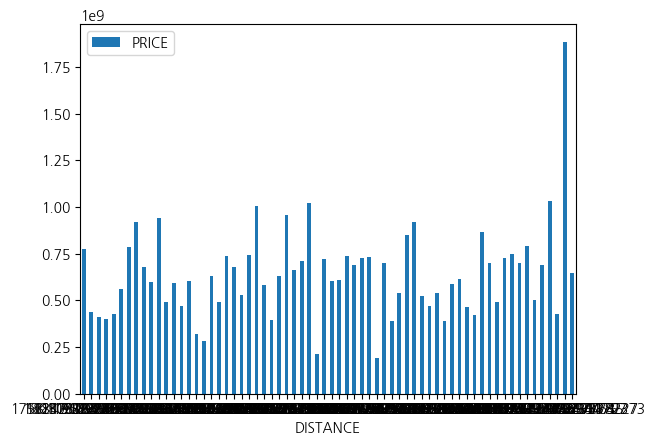

In [289]:
temp3.plot.bar(x='DISTANCE', y='PRICE', rot=0)

<Axes: xlabel='DISTANCE'>

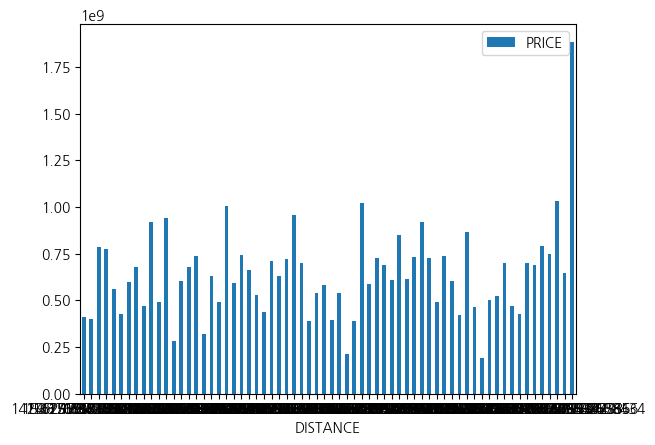

In [290]:
temp4.plot.bar(x='DISTANCE', y='PRICE', rot=0)

In [ ]:
projectdb = mysql.connector.connect(
    host="",
    user="master",
    password="",
    database="edaproject"
)
cursor = projectdb.cursor()


def GetLocationInfo(keyword):
    try:
        url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(keyword) # 키워드로 검색하는 URL 주소 요청
        headers = {'authorization': 'KakaoAK 58319f62a30cce26d40b890be26fc6fd'}
        # result = json.loads(str(requests.get(url, headers=headers).text))
        search_result_list = requests.get(url, headers = headers).json()['documents']
        search_result_1st = search_result_list[0]
        address = str(search_result_1st['road_address_name'])
        address_token = str(search_result_1st['address_name']).split(' ')
        for each_token in address_token:
            if each_token.endswith('동'):
                dong = each_token
            
        X = search_result_1st['y']
        Y = search_result_1st['x']
        list = [address, dong, X, Y]
        return list
    except:
        print(f'{keyword} 검색 결과에는 주소, X, Y 를 찾을 수 없습니다')

query = '''
SELECT * FROM edaproject.HANNAM_APARTMENT;
'''
HANNAM_APARTMENT  = pd.read_sql(query, projectdb)
HANNAM_APARTMENT = HANNAM_APARTMENT['APARTMENT']

HANNAM_APARTMENT_list = []
for each_apt_list in HANNAM_APARTMENT:
    try:
        location_info = GetLocationInfo(each_apt_list)
        location_info.insert(0, each_apt_list)
        HANNAM_APARTMENT_list.append(location_info)
    except:
        continue

df = pd.DataFrame(HANNAM_APARTMENT_list)

/var/folders/79/m8mlq40133v66kkf7xw8f89c0000gn/T/ipykernel_99731/3770341957.py:33: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  HANNAM_APARTMENT  = pd.read_sql(query, projectdb)


가락현대투웰브 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
그린아파트 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
로즈힐파크 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
신한빌라트-신한미지엔 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
신한에스빌-미지엔 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
아키죤2 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
예일 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
현대(5차) 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
현대(6차) 검색 결과에는 주소, X, Y 를 찾을 수 없습니다
가락동부센트레 검색 결과에는 주소, X, Y 를 찾을 수 없습니다


In [292]:
df

,0,1,2,3,4
0,e지브로,서울 송파구 양재대로66길 29,가락동,37.500680961365596,127.12464735605197
1,sk파크타워,서울 송파구 오금로 396,가락동,37.49797282088963,127.13425633697337
2,가락1차쌍용아파트,서울 송파구 동남로 193,가락동,37.49561144556601,127.1284385164609
3,가락3차쌍용스윗닷홈,서울 송파구 송이로21길 23,가락동,37.49774094166772,127.12296427076191
4,가락그랑밸리,서울 송파구 오금로35길 38,오금동,37.50609141449226,127.1289213045265
...,...,...,...,...,...
57,헬리오시티,서울 송파구 송파대로 345,가락동,37.4996100876749,127.111610941234
58,현대7,서울 광진구 구의강변로3가길 39,구의동,37.536836537217184,127.09093254601939
59,현대빌라트,서울 강남구 압구정로29길 49,압구정동,37.530481189262204,127.02732677886303
60,현대파크빌,서울 마포구 월드컵로7길 57-6,합정동,37.55262728936616,126.90886493819414


In [293]:

query = '''
SELECT * FROM edaproject.APARTMENT_PRICE_GARAK
where APARTMENT ='가락한일유앤아이' or APARTMENT LIKE '%우민-늘푸른아파트%' or  APARTMENT LIKE '%삼성프라자%' 
order by APARTMENT
'''

APARTMENT_PRICE_GARAK  = pd.read_sql(query, projectdb)


/var/folders/79/m8mlq40133v66kkf7xw8f89c0000gn/T/ipykernel_99731/868634560.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  APARTMENT_PRICE_GARAK  = pd.read_sql(query, projectdb)


In [294]:
APARTMENT_PRICE_GARAK

,YEAR,MONTH,GU,DONG,APARTMENT,SIZE_m2,SIZE_평,PRICE
0,2023,4,송파구,가락동,가락한일유앤아이,100.95,30.5,800000000
1,2016,11,송파구,가락동,가락한일유앤아이,100.95,30.5,480000000
2,2020,5,송파구,가락동,가락한일유앤아이,100.95,30.5,665000000
3,2020,6,송파구,가락동,가락한일유앤아이,100.95,30.5,695000000
4,2020,12,송파구,가락동,가락한일유앤아이,100.95,30.5,750000000
5,2017,5,송파구,가락동,가락한일유앤아이,100.95,30.5,493000000
6,2017,4,송파구,가락동,가락한일유앤아이,100.95,30.5,496000000
7,2018,8,송파구,가락동,가락한일유앤아이,100.95,30.5,650000000
8,2019,7,송파구,가락동,삼성프라자,131.29,39.7,655000000
9,2018,10,송파구,가락동,삼성프라자,131.29,39.7,580000000


In [295]:
APARTMENT_PRICE_GARAK_1 = APARTMENT_PRICE_GARAK[APARTMENT_PRICE_GARAK['APARTMENT'] == '가락한일유앤아이'].sort_values('YEAR')
APARTMENT_PRICE_GARAK_2 = APARTMENT_PRICE_GARAK[APARTMENT_PRICE_GARAK['APARTMENT'] == '삼성프라자'].sort_values('YEAR')
APARTMENT_PRICE_GARAK_3 = APARTMENT_PRICE_GARAK[APARTMENT_PRICE_GARAK['APARTMENT'] == '우민-늘푸른아파트'].sort_values('YEAR')

<Axes: xlabel='YEAR'>

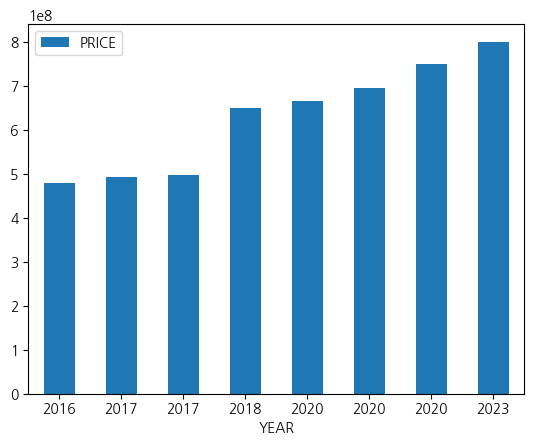

In [296]:
APARTMENT_PRICE_GARAK_1.plot.bar(x='YEAR', y='PRICE', rot=0)

<Axes: xlabel='YEAR'>

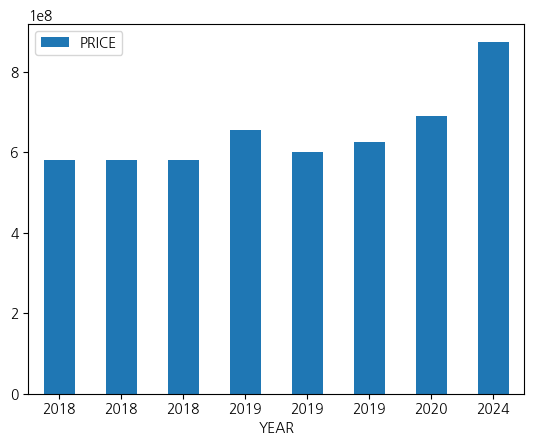

In [297]:
APARTMENT_PRICE_GARAK_2.plot.bar(x='YEAR', y='PRICE', rot=0)

<Axes: xlabel='YEAR'>

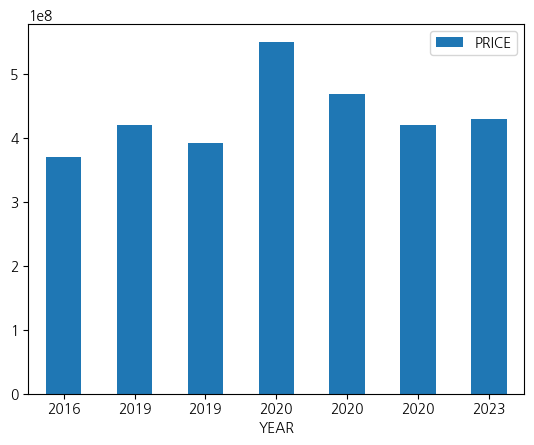

In [298]:
APARTMENT_PRICE_GARAK_3.plot.bar(x='YEAR', y='PRICE', rot=0)

In [ ]:
# Function

def GetLatLon(addr):
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query={address}'.format(address=addr)
    headers = {"Authorization": "KakaoAK 58319f62a30cce26d40b890be26fc6fd"}
    result = json.loads(str(requests.get(url, headers=headers).text))
    match_first = result['documents'][0]['address']
    return float(match_first['x']), float(match_first['y'])

# 위도 경도 가지오기
def AddLatLon(data):

    address = data['ADDRESS']
    X = []
    Y = []
    for each in address:
        try:
            LatLon = GetLatLon(each)
            X.append(LatLon[1])
            Y.append(LatLon[0])
        except:
            X.append('')
            Y.append('')


    data['X'] = X
    data['Y'] = Y

    return data
 
# 동 찾기
def Get_Dong(keyword):
    try:
        url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(keyword) # 키워드로 검색하는 URL 주소 요청
        headers = {'authorization': 'KakaoAK 58319f62a30cce26d40b890be26fc6fd'}
        # result = json.loads(str(requests.get(url, headers=headers).text))
        search_result_list = requests.get(url, headers = headers).json()['documents']
        search_result_1st = search_result_list[0]
        address_token = str(search_result_1st['address_name']).split(' ')
        for each_token in address_token:
            if each_token.endswith('동'):
                return each_token
            elif each_token.endswith('읍') or each_token.endswith('면'):
                return each_token

    except:
        print(f'이 검색어 [{keyword}] 는(은) 검색결과가 없습니다')
        return None

# 데이터프레임에 동 컬럼 전체적으로 추가할때 사용
def GetDataFrameWithDong(data, column_name):
    dt = []
    for idx , each_row in data.iterrows():
        keyword = each_row[column_name] #검색할 컬럼 
        dong = Get_Dong(keyword)
        final_list = each_row.tolist()
        final_list.append(dong)
        dt.append(final_list)
    df = pd.DataFrame(dt) 

    column_name = data.columns.to_list()
    column_name.append('NEW_DONG')
    df.columns = column_name
    return df


# 동 찾기
def Get_Add_Lat_Lon(keyword):
    try:
        url = 'https://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(keyword) # 키워드로 검색하는 URL 주소 요청
        headers = {'authorization': 'KakaoAK 58319f62a30cce26d40b890be26fc6fd'}
        # result = json.loads(str(requests.get(url, headers=headers).text))
        search_result_list = requests.get(url, headers = headers).json()['documents']
        search_result_1st = search_result_list[0]
        address = str(search_result_1st['road_address_name'])
        X = search_result_1st['y']
        Y = search_result_1st['x']
        list = [address , X, Y]
        return list
    except:
        print(f'{keyword} 검색 결과에는 주소, X, Y 를 찾을 수 없습니다')

def GetDataFrameWithAddLatLon(data, column_name):
    dt = []
    for idx , each_row in data.iterrows():
        keyword = each_row[column_name] #검색할 컬럼 
        Add_Lat_Lon = Get_Add_Lat_Lon(keyword)
        dong = Get_Dong(keyword)
        final_list = each_row.tolist()
        final_list.append(Add_Lat_Lon[0])
        final_list.append(dong)
        final_list.append(Add_Lat_Lon[1])
        final_list.append(Add_Lat_Lon[2])
        dt.append(final_list)
    df = pd.DataFrame(dt) 

    column_name = data.columns.to_list()
    column_name.append('ADDRESS')
    column_name.append('DONG')
    column_name.append('X')
    column_name.append('Y')
    df.columns = column_name
    return df

def SeoulDongMap(df):    
    path_dong = '/Users//dev/project_1/emd.json'
    path_gu = '/Users//dev/project_1/sig.json'

    # 시군구 & 동면읍 불러오기
    df_gu= gpd.read_file(path_gu)
    df_dong= gpd.read_file(path_dong)

    # 시군구 & 동면읍 합치기
    result_df = pd.merge(df_gu, df_dong, left_on=df_gu['SIG_CD'], right_on=df_dong['EMD_CD'].str[:5], how='left')

    gu_list = df['GU'].unique().tolist()    

    gdf_test = result_df[result_df['SIG_KOR_NM'].isin(gu_list)].reset_index(drop=True)

    seoul_dong_map = folium.Map(location=(37.51434733724219, 127.07303593988632), tiles="OpenStreetMap", zoom_start=12)

    # 시각화 할 경계선 색상 지정
    colors = [
        "darkred", "darkblue", "darkgreen", "darkpurple", "black", "gray", "navy", "midnightblue",
        "maroon", "indigo", "slategray", "dimgray", "darkslategray", "olive", "brown", "chocolate",
        "darkolivegreen", "teal", "saddlebrown", "darkmagenta", "darkorchid", "darkgoldenrod", 
        "darkcyan", "darkkhaki", "firebrick"
    ]

    # FeatureGroup 사전 생성
    layer_dict = {}

    # 각 경계선을 지도에 추가
    for idx, row in gdf_test.iterrows():
        
        gu_name = row['SIG_KOR_NM']
        dong_name = row['EMD_KOR_NM']
        polygon_wkt = row['geometry_y']
        
        if gu_name in layer_dict:
            layer = layer_dict[gu_name]
        else:
            # 해당 구이름에 대한 FeatureGroup가 없으면 새로 생성
            layer = folium.FeatureGroup(name=gu_name,show=True)
            layer_dict[gu_name] = layer
            layer.add_to(seoul_dong_map)
        
        color = colors[len(layer_dict) % len(colors)]
        
        t1 = folium.GeoJson(polygon_wkt, 
                        style_function=lambda feature, color=color: {
                            'fillColor': color, #채우기 색상
                            'fillOpacity': 0.3, #채우기 투명도
                            'color': color, # 테두리 색상
                            'weight': 1, #테두리 두께
                            'opacity': 1  # 테두리 투명도
                        },
                        tooltip=f'법정동: {dong_name}')
        
        t1.add_to(layer)

    for idx, row  in df.iterrows():
        folium.Marker((row['X'], row['Y']),
        tooltip=(row['STATION_NAME']),
        icon=folium.Icon(icon= 'star', color = 'blue'),
        ).add_to(seoul_dong_map)


    # folium.LayerControl 추가한 뒤, 지도 표시
    folium.LayerControl(collapsed=False).add_to(seoul_dong_map)
    folium.LatLngPopup().add_to(seoul_dong_map)
    display(seoul_dong_map)